# Week 2: EDA Assignment on the Weather Dataset Analysis
## Perform Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies within the Weather dataset that we used for week 1 Assignment.
Please address the following questions and tasks in your analysis:
1. Data Overview and Cleaning:
* What are the key characteristics of the dataset? (e.g., number of records, features, data types)
* Identify and handle any missing or null values. Describe your approach and reasoning.
* Check for and address any duplicate records.
2. Statistical Summary:
* Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
* Identify and describe any significant outliers in the data.
3. Data Visualization:
* Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
* Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
* Create correlation matrices and heatmaps to identify relationships between different weather parameters.
4. Weather Patterns and Trends:
* Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
* Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?
5. Insights and Conclusions:
* Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
* How can these insights be useful for weather prediction or other practical applications?
6. Recommendations for Further Analysis:
* Suggest areas for further analysis or additional data that might be useful to explore.

Please present your findings in a well-organized report, including both written explanations and visualizations. Use appropriate libraries (e.g., pandas, matplotlib, seaborn) and ensure your code is well-documented and reproducible

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [3]:
data = pd.read_csv("new_weather_data.csv")
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31,19:00:00
8780,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31,20:00:00
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31,21:00:00
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31,22:00:00


### Question 1: Data Overview and Cleaning:
### What are the key characteristics of the dataset? (e.g., number of records, features, data types)

In [5]:
data.shape[0:]

(8784, 9)

In [6]:
data.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Weather_Condition', 'Date', 'Time'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temp_C             8784 non-null   float64
 1   Dew Point Temp_C   8784 non-null   float64
 2   Rel Hum_%          8784 non-null   int64  
 3   Wind Speed_km/h    8784 non-null   int64  
 4   Visibility_km      8784 non-null   float64
 5   Press_kPa          8784 non-null   float64
 6   Weather_Condition  8784 non-null   object 
 7   Date               8784 non-null   object 
 8   Time               8784 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 617.8+ KB


### Identify and handle any missing or null values. Describe your approach and reasoning.

In [8]:
data.isna().sum()

Temp_C               0
Dew Point Temp_C     0
Rel Hum_%            0
Wind Speed_km/h      0
Visibility_km        0
Press_kPa            0
Weather_Condition    0
Date                 0
Time                 0
dtype: int64

Our data seems to have no null values. This is pretty good. For events where there is missing or null values present, there are different ways and techniques to go about that.
* drop the null values
* amputate the null values with mean, mode, median or quartiles.
* equate them to zero

all this will depend on the nature of the dataset. Research well on your dataset and see which techniques will be valuable.

### Check for and address any duplicate records.

In te case where one has a small dataset, duplicate would be used since it provides the boolean values True where there is any presence of duplication and False for vice versa.

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

But in the case of a large dataset, you want to sum up and get the total count of the duplicates which we can later on drop

In [10]:
data.duplicated().sum()

0

### Question 2: Statistical Summary:
### Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.

In [11]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### Identify and describe any significant outliers in the data.

There are many ways that one can determine th eoutliers in a dataset. this may include
1. Performing summary statistics
2. Visualizing the data
3. using the z score
4. Inter-quartile Range metod

For today we shall only look into the the first three.

In [19]:
px.line(data_frame = data, x = "Date", y="Wind Speed_km/h", title = "Viewing for outliers")

In [14]:
px.line(data_frame = data, x = "Date", y="Temp_C", title = "Viewing for outliers")

In [15]:
px.line(data_frame = data, x = "Date", y="Press_kPa", title = "Viewing for outliers")

In [17]:
px.line(data_frame = data, x = "Date", y="Dew Point Temp_C", title = "Viewing for outliers")

In [18]:
px.line(data_frame = data, x = "Date", y="Rel Hum_%", title = "Viewing for outliers")

Calculate Z-scores to find outliers. Typically, a Z-score greater than 3 or less than -3 is considered an outlier.

In [27]:
# Assuming 'data' is your DataFrame
# columns_to_check = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Calculate Z-scores for each numerical column
z_scores = stats.zscore(data['Wind Speed_km/h'])

# Identify outliers: Z-score > 3 or Z-score < -3
outliers = (z_scores_df > 3) | (z_scores_df < -3)

# Get the rows with any outlier
outlier_indices = outliers.any(axis=1)
outlier_data = data[outlier_indices]

print("Outlier Data:")
print(outlier_data)


Outlier Data:
      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
33       1.8              -3.7         67               44           24.1   
34       1.5              -4.1         66               43           24.1   
36       1.7              -6.2         56               48           24.1   
409      3.7              -2.1         66               83           25.0   
410      0.5              -4.0         72               70           25.0   
...      ...               ...        ...              ...            ...   
8538     1.4               0.3         92               46           25.0   
8669    -7.5              -9.1         88               43            1.2   
8671    -6.5              -7.6         92               44            1.2   
8677    -5.4              -6.7         91               48            0.6   
8678    -5.2              -6.7         89               46            0.6   

      Press_kPa  Weather_Condition        Date      Time  
33

The z score would not be a good technique to use on our datset since our values are so much higheted with the threshold rule of thumn in the z score technique for ourlier checking.


### Question 3: Data Visualization:
Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

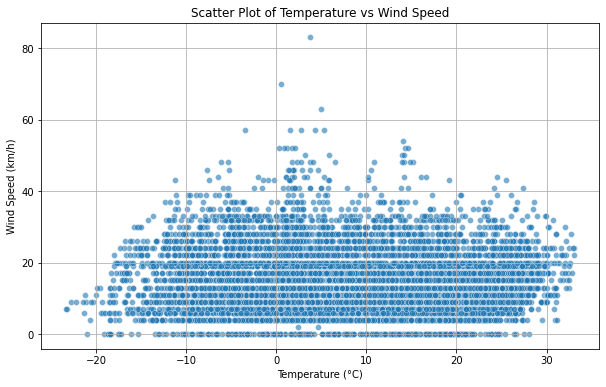

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Wind Speed_km/h', data=data, alpha=0.6)
plt.title('Scatter Plot of Temperature vs Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (km/h)')
plt.grid(True)
plt.show()


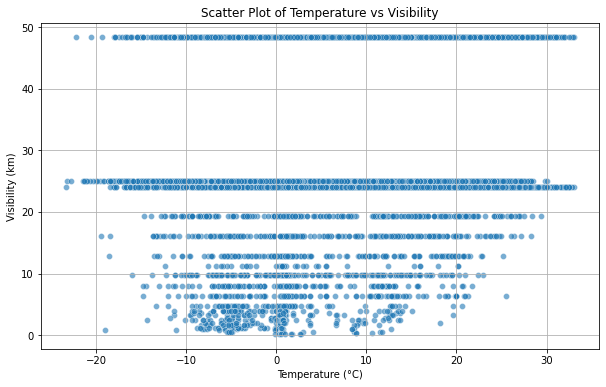

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Visibility_km', data=data, alpha=0.6)
plt.title('Scatter Plot of Temperature vs Visibility')
plt.xlabel('Temperature (°C)')
plt.ylabel('Visibility (km)')
plt.grid(True)
plt.show()


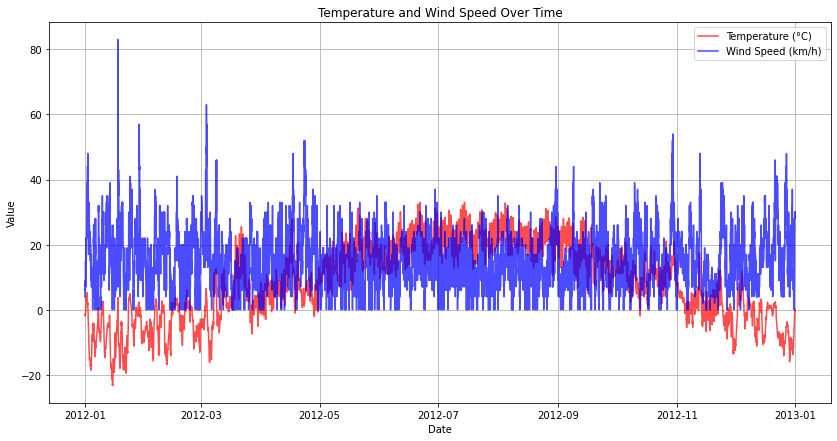

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(data['Datetime'], data['Temp_C'], label='Temperature (°C)', color='r', alpha=0.7)
plt.plot(data['Datetime'], data['Wind Speed_km/h'], label='Wind Speed (km/h)', color='b', alpha=0.7)
plt.title('Temperature and Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


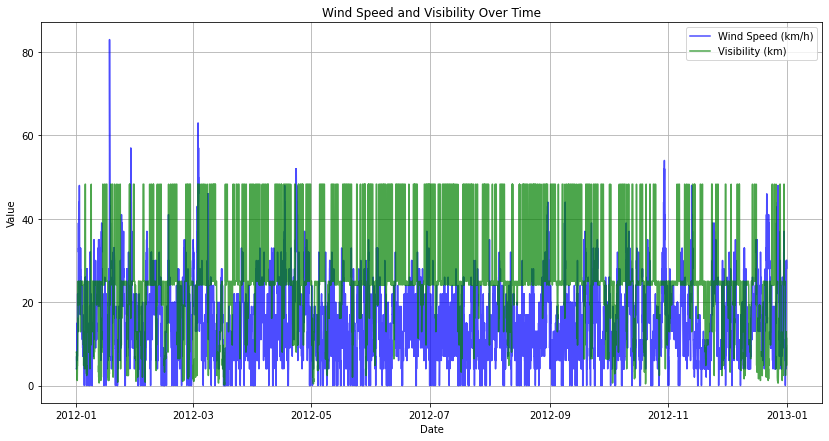

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(data['Datetime'], data['Wind Speed_km/h'], label='Wind Speed (km/h)', color='b', alpha=0.7)
plt.plot(data['Datetime'], data['Visibility_km'], label='Visibility (km)', color='g', alpha=0.7)
plt.title('Wind Speed and Visibility Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Create correlation matrices and heatmaps to identify relationships between different weather parameters.

In [41]:
data.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


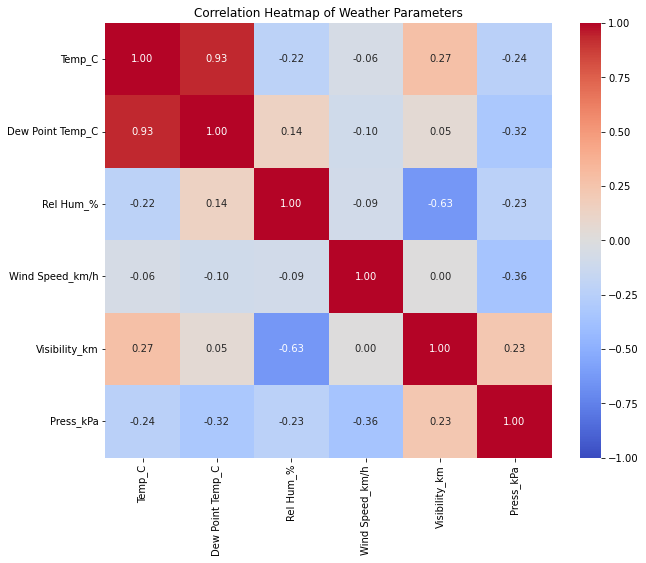

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Parameters')
plt.show()


### Question 4: Weather Patterns and Trends:
### Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?
### Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

In [45]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and add to DataFrame
data['Month'] = data['Date'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add season column
data['Season'] = data['Month'].apply(get_season)

In [46]:
data

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Condition,Date,Time,Datetime,Month,Season
0,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01,00:00:00,2012-01-01 00:00:00,1,Winter
1,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01,01:00:00,2012-01-01 01:00:00,1,Winter
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01,02:00:00,2012-01-01 02:00:00,1,Winter
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01,03:00:00,2012-01-01 03:00:00,1,Winter
4,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01,04:00:00,2012-01-01 04:00:00,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31,19:00:00,2012-12-31 19:00:00,12,Winter
8780,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31,20:00:00,2012-12-31 20:00:00,12,Winter
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31,21:00:00,2012-12-31 21:00:00,12,Winter
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31,22:00:00,2012-12-31 22:00:00,12,Winter


Text(0, 0.5, 'Temperature (°C)')

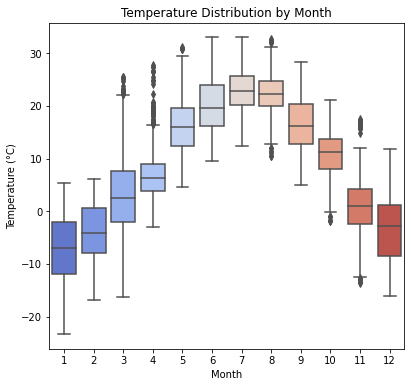

In [47]:
plt.figure(figsize=(14, 6))

# Temperature by Month
plt.subplot(1, 2, 1)
sns.boxplot(x='Month', y='Temp_C', data=data, palette='coolwarm')
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')


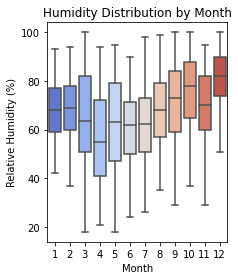

In [48]:
# Humidity by Month
plt.subplot(1, 2, 2)
sns.boxplot(x='Month', y='Rel Hum_%', data=data, palette='coolwarm')
plt.title('Humidity Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')

plt.tight_layout()
plt.show()


### Trends and Patterns
1. Temperature and Humidity by Month:

* Temperature typically increases in summer months (June, July, August) and decreases in winter months (December, January, February).
* Humidity may vary significantly depending on location, with higher values in warmer, tropical months and lower values in cooler, winter months.

2. Temperature and Humidity by Season:

* Winter: Generally colder temperatures and can have varying humidity levels depending on the region.
* Spring and Fall: Temperatures are moderate with potentially variable humidity.
* Summer: Typically warmer temperatures with high humidity, especially in tropical or coastal regions.

### Anomalies
1. Temperature Outliers: Extremely high or low temperatures may be due to unusual weather events or errors in data collection.

2. Humidity Patterns: Sudden spikes or drops in humidity might be due to specific weather conditions or environmental changes.Investigating these trends and anomalies will provide insights into seasonal weather patterns and any unusual events or data points.

### Question 5: Insights and Conclusions:
### Summarize the key insights you have gained from your EDA. What are the most interesting or surprising findings?
### How can these insights be useful for weather prediction or other practical applications?


## Insights and Conclusions from EDA
1. Seasonal Temperature and Humidity Patterns:

`Temperature Trends:`

* Temperatures typically rise during the summer months (June to August) and fall during the winter months (December to February).
* There is a noticeable variation in temperature across seasons, with summer showing the highest temperatures and winter the lowest.

` Humidity Trends:`

* Humidity levels often increase in warmer months due to higher moisture in the air.
* In winter, humidity levels might be lower in some regions, though this can vary based on local climate conditions.

2. Month-to-Month Variability:

`Temperature Variability:`

* Temperature distributions across months show clear seasonal trends with outliers potentially indicating unusual weather patterns.

`Humidity Variability:`

* Humidity distributions reveal seasonal shifts and possible anomalies which might indicate exceptional weather events or measurement errors.

3. Scatter Plot Observations:

`Temperature vs. Wind Speed:`

* No strong linear relationship between temperature and wind speed; however, certain weather conditions (e.g., storms) could influence both.

`Temperature vs. Humidity:`

* The scatter plot may reveal trends where higher temperatures correlate with higher humidity, particularly in tropical or coastal regions.

`Temperature vs. Visibility:`

* A possible inverse relationship might be observed where lower visibility correlates with lower temperatures, potentially due to fog or other weather conditions.

`Wind Speed vs. Humidity:`

* High wind speeds may correlate with lower humidity in some cases, possibly due to increased evaporation or drying effects.

4. Anomalies Detected:

`Extreme Temperatures:`

* Outliers in temperature data might indicate extreme weather events or potential errors in data recording.

`Unusual Humidity Patterns:`

* Unexpected spikes or drops in humidity could suggest specific weather phenomena or unusual environmental conditions.

# Practical Applications:
1. Weather Prediction:

`Seasonal Adjustments:`
* Understanding seasonal trends allows for better weather forecasting by accounting for typical temperature and humidity patterns during different times of the year.

`Anomaly Detection:`
* Identifying anomalies helps in refining predictive models by incorporating special conditions or exceptions that might not fit standard patterns.
2. Climate Adaptation:

`Urban Planning:`
* Insights into temperature and humidity variations assist in designing buildings and infrastructure that can better withstand local climate conditions.

`Agriculture:`
* Farmers can use temperature and humidity patterns to optimize planting and harvesting schedules, and to prepare for unusual weather events.
3. Public Health and Safety:

`Health Alerts:`
* Extreme temperatures and humidity levels can impact health; insights from the data can help issue warnings and advice to the public.

`Emergency Preparedness:`
* Understanding historical weather patterns can help in preparing for extreme weather events and mitigating their impacts.
4. Environmental Monitoring:

`Climate Change Studies:`
* Long-term temperature and humidity trends are crucial for studying climate change and its effects on local and global scales.

`Air Quality Management:`
* Temperature and humidity data contribute to understanding air quality and pollution levels, aiding in environmental protection efforts.